In [1]:
from logging import Formatter
from os import stat_result
import numpy as np
from numpy.lib.index_tricks import index_exp
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
# Finding index from raw data file TRSYS01_Public.dat
class RawData_index:

    def __init__(self, name, start, end):
        self.name = name
        self.start = start
        self.end = end

    # Initial dataframe to find indexes of first and last datapoint
    def dfinit(self):
        df = pd.read_csv('raw/' + self.name,
                    skiprows=1, usecols=['TIMESTAMP'])

        first = -1
        last = -1
        lt = len(self.start)

        df = df.to_numpy()
        for i in range(len(df)):
            if str(df[i][0])[0:lt] == self.start:
                first = i
            if str(df[i][0])[0:lt] == self.end:
                last = i

        if (first == -1) or (last == -1):
            print('ERROR! Timestamp does not work!')
            return

        return first, last

    # finding index of columns
    def cols(self):
        df = pd.read_csv('raw/' + self.name, skiprows=1, low_memory=False)

        ti1 = df.columns.get_loc('T11')
        te1 = df.columns.get_loc('T21')
        ti2 = df.columns.get_loc('DT1temp')
        te2 = df.columns.get_loc('DT2temp')
        hf1 = df.columns.get_loc('HF1')
        hf2 = df.columns.get_loc('HF2')

        return [ti1, te1, ti2, te2, hf1, hf2]

# Extracting selected vectors from raw data file TRSYS01_Public.dat
class RawData_series:

    def __init__(self, name, f_ind, l_ind, columns):
        self.name = name
        self.f_ind = f_ind
        self.l_ind = l_ind
        self.columns = columns

    # Extracting function and averaging for every "ts_avg" minutes
    def ex_vect(self):

        first = self.f_ind + 2
        num_rows = self.l_ind - self.f_ind

        x_val = []

        for i in range(num_rows):
            x_val.append(i)

        x_val = np.array(x_val)

        df = pd.read_csv('raw/' + self.name, usecols=self.columns, skiprows=first,
                        nrows=num_rows, header=None)

        for col in range(len(self.columns)):
            globals()[f"c{col}"] = df.iloc[:,col].to_numpy()

        return [c0, c1, c2, c3, c4*(-1), c5*(-1), x_val]

In [3]:
def vectsave(ts, name):
    delta_t = ts[0] - ts[1]
    q = ts[4].copy()

    heading = ['v1', 'v2']

    with open('model_input/' + name + '.csv', 'w') as file:
        write = csv.writer(file)
        write.writerow(heading)
        write.writerows([delta_t[i], q[i]] for i in range(len(q)))

    return delta_t, q

In [4]:
def vectsave2(ts):
    tint = ts[0].copy()
    text = ts[1].copy()
    q = ts[4].copy()

    heading = ['tint', 'text', 'q']

    with open('model_input/vectors2.csv', 'w') as file:
        write = csv.writer(file)
        write.writerow(heading)
        write.writerows([tint[i], text[i], q[i],] for i in range(len(q)))

    return tint, text, q


In [5]:
file_name = 'measurement.dat'
name = 'mursko_sredisce'

start = '2021-10-06 14:00'
end = '2021-10-15 07:00'
calc_start = '2021-10-06 14:00'
calc_end = '2021-10-15 07:00'

avg_const = 30

ind_o = RawData_index(file_name, start, end)
first_ind, last_ind = ind_o.dfinit()
first_calc, last_calc = ind_o.dfinit()
first_calc = first_calc
calc_rows = last_calc - first_calc
columns = ind_o.cols()
vect_o = RawData_series(file_name, first_ind, last_ind, columns)
# List "ts" contains following vectors
# T11, T21, DT1temp, DT2temp, HF1, HF2, TIMESTAMP
ts = vect_o.ex_vect()
print(len(ts[0]))


11943


In [6]:
v1, v2 = vectsave(ts, name)
v1

array([1.63313 , 0.54977 , 6.6883  , ..., 5.591649, 5.633483, 5.675216])

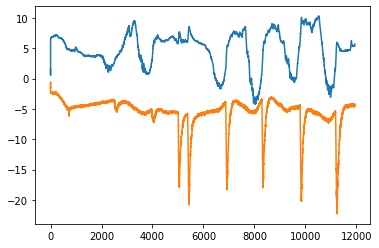

In [7]:
plt.plot(v1)
plt.plot(v2)

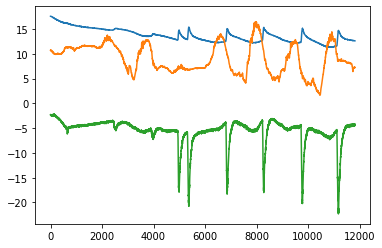

In [78]:
tint, text, q = vectsave2(ts)
plt.plot(tint)
plt.plot(text)
plt.plot(q)

In [101]:
v2 = pd.read_csv('raw/v1.csv', sep=',').values
v1 = pd.read_csv('raw/Zagreb2021.csv', sep=',').values
v1 = 21 - v1
vectors_zg = np.column_stack((v1, v2))
vectors_zg

array([[23.22222222, -5.00531874],
       [23.77777778, -5.00238838],
       [23.77777778, -5.00035782],
       ...,
       [22.11111111, -4.17228267],
       [22.11111111, -4.17506037],
       [23.22222222, -4.17886501]])

In [102]:
heading = ['v1', 'v2']

with open('model_input/vectors_zg.csv', 'w') as file:
    write = csv.writer(file)
    write.writerow(heading)
    write.writerows(vectors_zg[i] for i in range(len(v1)))

In [11]:
import torch

a = torch.tensor([1, 2, 3, 4, 5, 6])
a = a.view(2, 1, 3)
len(a.flatten())

6

In [12]:
a = np.array([1, 2, 3])
b = np.array([4, 4, 3])
c = a - b
s1 = np.sum(c)
s2 = np.sum(a) - np.sum(b)x

s1 == s2

True